<a href="https://colab.research.google.com/github/DHARMADEVIKEERTHI/Titanic-/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("/content/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Technique - 1: Handling Missing data**

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**TYPE - 1: Removing missing values**

In [8]:
df.dropna().shape

(183, 12)

In [9]:
df.dropna(axis=1).shape

(891, 9)

**TYPE - 2: Mean Imputation for Normally distributed data**

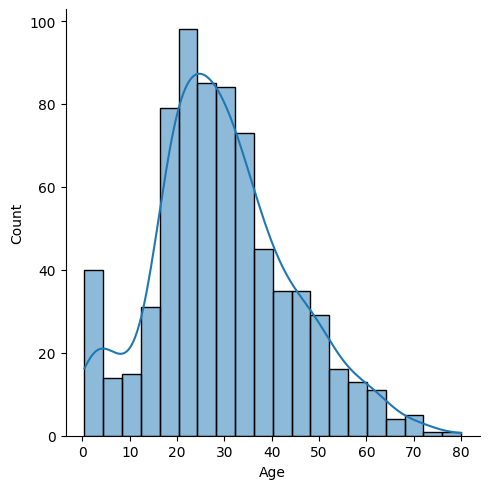

In [12]:
sns.displot(df['Age'],kde=True)

In [14]:
df['Age'].mean().round(0)

np.float64(30.0)

In [15]:
df.fillna(df['Age'].mean().round(0),inplace=True)

In [16]:
df['Age'].isnull().sum()

np.int64(0)

**TYPE - 3: Median Imputation for dataset with outlier**

In [17]:
df['Age'].median()

30.0

**TYPE - 3: Mode Imputation for Categorical values**

In [18]:
df['Embarked'].mode()

,Embarked
0,S


In [19]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-19-4a47dd7a9b9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [20]:
df['Embarked'].isnull().sum()

np.int64(0)

**TYPE - 4: Random Sampling Imputation**

In [22]:
df['Age'][0]

np.float64(22.0)

In [23]:
df['Age'].fillna(df['Age'][0])

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,30.0
889,26.0


**TYPE - 5: Arbitrary Imputation**

In [24]:
df['Age'].fillna(100)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,30.0
889,26.0


# **Handle Imbalanced dataset**

In [25]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


class 0 -- 61% & class 1 -- 38%

n/t*100

In [30]:
from sklearn.utils import resample

Upsampling

In [31]:
df_minority=df[df['Survived'] == 1]
df_majority=df[df ['Survived'] == 0]

In [32]:
upsampled_df = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [33]:
upsampled_df.shape

(549, 12)

In [34]:
actual_df = pd.concat([df_majority,upsampled_df])

In [35]:
actual_df['Survived'].value_counts()

,count
Survived,
0,549
1,549


Downsampling

In [36]:
downsampled_df = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [37]:
downsampled_df.shape

(342, 12)

In [38]:
actual_df = pd.concat([downsampled_df,df_minority])

In [39]:
actual_df['Survived'].value_counts()

,count
Survived,
0,342
1,342


**SMOTE - Synthetic Minority Oversampling Techniques**

In [40]:
pip install imblearn

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,30.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30.0,S


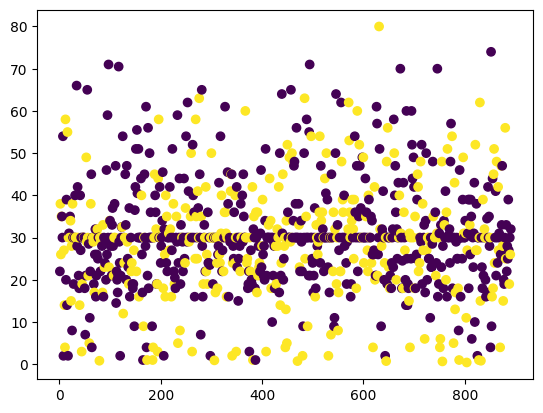

In [43]:
plt.scatter(df['PassengerId'],df['Age'], c = df['Survived'])

In [44]:
df.shape

(891, 12)

In [45]:
smote = SMOTE()

In [46]:
X,y = smote.fit_resample(df[['PassengerId','Age']],y = df['Survived'])

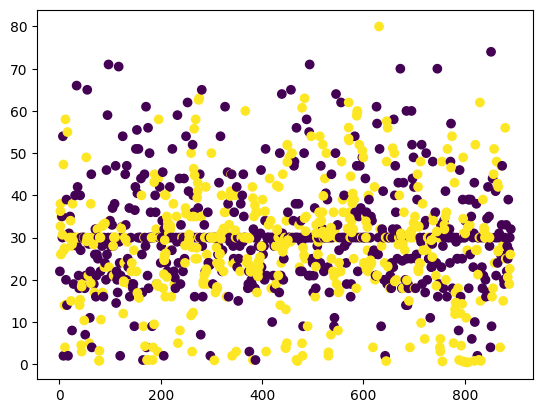

In [47]:
plt.scatter(X['PassengerId'],X['Age'], c = y)

# **3. Handle Outliers**

In [48]:
Q1 = np.quantile(df['Age'],0.25)
Q2 = np.quantile(df['Age'],0.50)
Q3 = np.quantile(df['Age'],0.75)

In [49]:
IQR = Q3-Q1

In [50]:
IQR

np.float64(13.0)

In [51]:
lowerference = Q1 - (1.5*IQR)
upperference = Q3 + (1.5*IQR)

In [52]:
lowerference,upperference

(np.float64(2.5), np.float64(54.5))

In [53]:
outliers = []
for i in df['Age']:
  if i < lowerference or i > upperference:
    outliers.append(i)

In [54]:
len(outliers)

66

<Axes: ylabel='Age'>

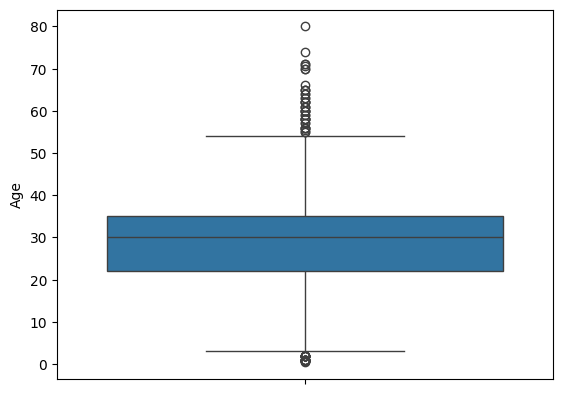

In [55]:
sns.boxplot(df['Age'])

# **Categorical values Encoding**

In [56]:
columns = ['Pclass','Sex','Embarked']

for column in columns:
  print(column)
  print(df[column].unique())

Pclass
[3 1 2]
Sex
['male' 'female']
Embarked
['S' 'C' 'Q' np.float64(30.0)]


**Nominal or One Hot Encoding**

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
onehotencoder = OneHotEncoder()

In [65]:
sex_encoded = onehotencoder.fit_transform(df[['Sex']]).toarray()

In [66]:
sex_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,30.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30.0,S


In [68]:
sex_encoded_df = pd.DataFrame(sex_encoded,columns=onehotencoder.get_feature_names_out())

In [69]:
sex_encoded_df

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,30.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30.0,S


**Label Encoder**

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
labelencoder = LabelEncoder()

In [81]:
sex_encoded = labelencoder.fit_transform(df[['Embarked']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float64', 'str']

In [78]:
sex_encoded_df = pd.DataFrame(sex_encoded, columns=['sex_label_encoded'])

In [79]:
sex_encoded_df

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


**Ordinal Encoding**